In [11]:
import pandas as pd

df = pd.read_csv("data/data.csv", sep=";", quotechar='"')
print(df.columns.tolist())
df.head()


['ID', 'design_preference', 'age_group', 't_A', 't_B', 'vas_A', 'vas_B']


,ID,design_preference,age_group,t_A,t_B,vas_A,vas_B
0,1,0,1,30.920,22.846,0.665,0.657
1,2,1,1,14.411,20.367,0.700,0.717
2,3,1,1,19.116,17.611,0.637,0.688
3,4,1,0,39.704,28.309,0.595,0.693
4,5,0,1,32.509,27.516,0.560,0.535


## Aufgabe 1 a

Um zu prüfen, ob der beobachtete Unterschied statistisch signifikant ist, stellt man zunächst eine Nullhypothese auf, die es anschließend zu widerlegen gilt.

## Nullhypothese und Binomialverteilung

Ansetzen kann man hier mit einer Binomialverteilung, bei der unter der Nullhypothese eine perfekte 50/50-Verteilung angenommen wird.

## Signifikanzniveau und p-Wert

Damit wir die Nullhypothese verwerfen können, muss die Wahrscheinlichkeit, dass unsere Datensätze mit der Nullhypothese vereinbar sind (p-Wert), kleiner als 0,05 sein.

Jetzt das Ganze im Code:



In [13]:
from scipy.stats import binomtest

n = len(df)
k_1 = (df["design_preference"] == 1).sum()  # Anzahl Design B

test = binomtest(k_1, n, p=0.5, alternative="two-sided")

print("Anzahl Beobachtungen:", n)
print("Anzahl Design B (1):", k_1)
print("Anzahl Design A (0):", n - k_1)
print("p-Wert:", f"{test.pvalue:.3f}")


Anzahl Beobachtungen: 90
Anzahl Design B (1): 54
Anzahl Design A (0): 36
p-Wert: 0.073


Aus dem p-Wert (0.073) und unserem α (0.05) kann man die Nullhypothese nicht verwerfen, woraus sich keine statistisch signifikante Präferenz für eines der beiden UI-Designs in der Grundgesamtheit ableiten lässt.

---

## Aufgabe 1 b

Wie im Unterricht und auf den Slides zu sehen, bietet sich hier ein Chi²-Test an.
Auch hier stellen wir wieder zuerst die beiden Hypothesen auf.

**Nullhypothese (H₀):** Altersgruppe und UI-Design-Präferenz sind unabhängig.

**Alternativhypothese (H₁):** Es gibt einen Zusammenhang (Assoziation) zwischen Alter und UI-Design-Präferenz.


In [19]:
age_map = {0: "<30", 1: "≥30"}
design_map = {0: "UI-Design A", 1: "UI-Design B"}

ct = pd.crosstab(
    df["age_group"].map(age_map),
    df["design_preference"].map(design_map),
    rownames=["Altersgruppe"],
    colnames=["Bevorzugtes UI-Design"]
)

print(ct)


Bevorzugtes UI-Design  UI-Design A  UI-Design B
Altersgruppe                                   
<30                             19            7
≥30                             17           47


In [16]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(ct)

print("Chi-Quadrat-Wert:", f"{chi2:.3f}")
print("Freiheitsgrade:", dof)
print("p-Wert:", f"{p:.6f}")
print("Erwartete Häufigkeiten:")
print(expected)


Chi-Quadrat-Wert: 14.786
Freiheitsgrade: 1
p-Wert: 0.000120
Erwartete Häufigkeiten:
[[10.4 15.6]
 [25.6 38.4]]


Bei einem Signifikanzniveau von α=0,05 wird die Nullhypothese verworfen.
Es liegt damit eine statistisch signifikante Assoziation zwischen Altersgruppe und UI-Design-Präferenz vor.

---

## Aufgabe 1 c

Aus der Tabelle lässt sich bereits eine Tendenz in Richtung des UI-Designs B feststellen, dennoch muss dies zunächst statistisch überprüft werden.

**Nullhypothese (H₀):**
Innerhalb der Altersgruppe ≥30 sind beide UI-Designs gleich beliebt, d. h. die Präferenzen für UI-Design A und UI-Design B sind gleich verteilt (50/50).

**Alternativhypothese (H₁):**
Innerhalb der Altersgruppe ≥30 sind die beiden UI-Designs nicht gleich beliebt, d. h. die Präferenzen weichen von einer 50/50-Verteilung ab.


In [21]:
df_30 = df[df["age_group"] == 1]

n_30 = len(df_30)
k1_30 = (df_30["design_preference"] == 1).sum()  # Anzahl, die Design B wählen

test_30 = binomtest(k1_30, n_30, p=0.5, alternative="two-sided")

print("Anzahl Beobachtungen (≥30):", n_30)
print("Anzahl Design B (1):", k1_30)
print("Anzahl Design A (0):", n_30 - k1_30)
print("p-Wert:", f"{test_30.pvalue:.6f}")


Anzahl Beobachtungen (≥30): 64
Anzahl Design B (1): 47
Anzahl Design A (0): 17
p-Wert: 0.000227


Durch den p Wert kann Nullhypothese verworfen werden :)

---

## Aufgabe 2 a

Ziel war es zu prüfen, ob sich die Bearbeitungszeiten zwischen den beiden Webshop-Prototypen A und B signifikant unterscheiden.

Dazu wurden für alle 90 Nutzer die Zeiten in Sekunden für das Finden eines bestimmten Produkts in beiden Prototypen gemessen (t_A für Prototyp A, t_B für Prototyp B). Da jeweils dieselbe Person beide Prototypen verwendet hat, handelt es sich um verbundene Messungen. Deshalb wurde ein t-Test für verbundene Stichproben verwendet.

**Nullhypothese (H₀):**
Der mittlere Zeitaufwand ist in beiden Prototypen gleich (μ_A = μ_B).

**Alternativhypothese (H₁):**
Der mittlere Zeitaufwand unterscheidet sich zwischen den Prototypen (μ_A ≠ μ_B).


In [27]:
#Mittelwert
mean_A = df["t_A"].mean()
mean_B = df["t_B"].mean()

print("Mittelwert t_A:", round(mean_A, 3))
print("Mittelwert t_B:", round(mean_B, 3))

from scipy.stats import ttest_rel

# t-Test für verbundene Stichproben (zweiseitig)
t_stat, p_value = ttest_rel(df["t_A"], df["t_B"])

print("t-Statistik:", round(t_stat, 3))
print("p-Wert:", f"{p_value:.6f}")



Mittelwert t_A: 29.375
Mittelwert t_B: 25.436
t-Statistik: 3.703
p-Wert: 0.000369


Bei einem Signifikanzniveau von a = 0,05 wird die Nullhypothese verworfen, sodass Prototyp B signifikant schneller ist.

---

## Aufgabe 2 b – Effektgröße Cohen’s d

Nachdem wir mit dem t-Test gezeigt haben, dass sich die Bearbeitungszeiten der beiden Prototypen signifikant unterscheiden, wollen wir nun die **Größe** dieses Unterschieds bestimmen. Dafür verwenden wir die Effektgröße **Cohen’s d** für gepaarte Stichproben.


In [29]:
from math import sqrt

cohen_d_t = t_stat / sqrt(n)
print("Cohen's d:", round(cohen_d_t, 6))


Cohen's d: 0.390322


Aus der Tabelle aus der Angabe lässt sich ein kleiner Effekt ablesen.

---

## Aufgabe 3 a

Ähnlich zu Bsp. B aus der Vorlesung, deshalb auch Ansatz über Pearson Korrelationskoeffizient
Zunächst wieder die beiden Hypothesen aufstellen:

**Nullhypothese (H₀):**
Zwischen der Zeitdauer der Produktsuche (t_A) und der Bewertung auf der VAS-Skala (vas_A) besteht kein linearer Zusammenhang. Formal: ρ = 0.

**Alternativhypothese (H₁):**
Zwischen t_A und vas_A besteht ein linearer Zusammenhang (positive oder negative Assoziation). Formal: ρ ≠ 0.

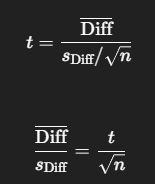

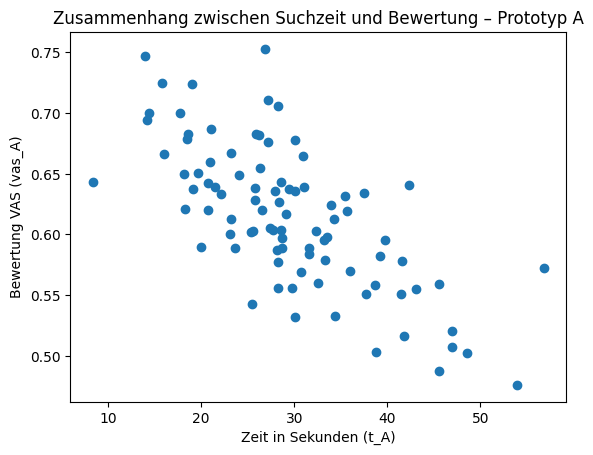

Pearson r (t_A vs. vas_A): -0.702831
p-Wert: 0.0000000000000115


In [36]:
import matplotlib.pyplot as plt

plt.scatter(df["t_A"], df["vas_A"])
plt.xlabel("Zeit in Sekunden (t_A)")
plt.ylabel("Bewertung VAS (vas_A)")
plt.title("Zusammenhang zwischen Suchzeit und Bewertung – Prototyp A")
plt.show()

from scipy.stats import pearsonr

r_A, p_A = pearsonr(df["t_A"], df["vas_A"])

print("Pearson r (t_A vs. vas_A):", round(r_A, 6))
print("p-Wert:", f"{p_A:.16f}")


Bei einem Signifikanzniveau von α = 0.05 wird die Nullhypothese damit verworfen. Es liegt also eine
**statistisch signifikante, negative Assoziation** zwischen Suchzeit und Bewertung vor:
Je länger Nutzer für die Produktsuche benötigen, desto niedriger fällt die VAS-Bewertung von
Prototyp A

---

## Aufgabe 3 b

Das gleiche wie 3 a nur diesmal für den anderen Prototypen



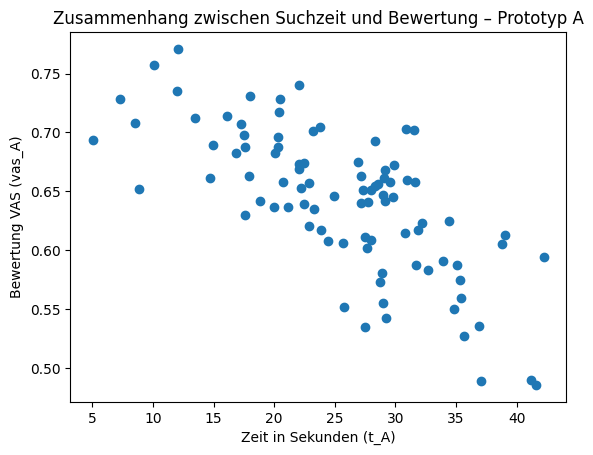

r_B: -0.716
p_B: 0.0000000000000023


In [39]:
import matplotlib.pyplot as plt

plt.scatter(df["t_B"], df["vas_B"])
plt.xlabel("Zeit in Sekunden (t_A)")
plt.ylabel("Bewertung VAS (vas_A)")
plt.title("Zusammenhang zwischen Suchzeit und Bewertung – Prototyp A")
plt.show()

from scipy.stats import pearsonr

r_B, p_B = pearsonr(df["t_B"], df["vas_B"])
print("r_B:", round(r_B, 3))
print("p_B:", f"{p_B:.16f}")


Ähnlich eindeutige Ergebnisse wie bei 3 a!

---

